In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()
btc_price = btc_response["data"]["1"]["quotes"]["CAD"]["price"]

# Fetch current ETH price
eth_response = requests.get(eth_url).json()
eth_price = eth_response["data"]["1027"]["quotes"]["CAD"]["price"]

# Compute current value of my crpto
my_btc_value = (btc_price*my_btc)
my_eth_value = (eth_price*my_eth)

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $71136.08
The current value of your 5.3 ETH is $22673.21


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [8]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [9]:
# Format current date as ISO format
today = pd.Timestamp("2021-09-09").isoformat()

In [10]:
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_investments = alpaca.get_barset(
    tickers,
    timeframe,
    start = today
).df

df_investments.head()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2021-04-23 00:00:00-04:00  114.81  115.0860  114.6415  114.75  3506457   
2021-04-26 00:00:00-04:00  114.74  114.8015  114.6500  114.65  2867784   
2021-04-27 00:00:00-04:00  115.13  115.1300  114.3700  114.37  3421667   
2021-04-28 00:00:00-04:00  114.45  114.4685  114.2000  114.44  6185936   
2021-04-29 00:00:00-04:00  114.14  114.3700  114.0900  114.37  5796983   

                              SPY                                      
                             open    high       low   close    volume  
time                                                                   
2021-04-23 00:00:00-04:00  412.87  418.25  412.7900  416.72  62184753  
2021-04-26 00:00:00-04:00  417.44  418.22  416.8111  417.64  44689009  
2021-04-27 00:00:00-04:00  417.91  418.14  416.3000  417.48  45962655  
2021-04-28 00:00:00-04:00  417.81  419.01  416.9000  417.35  45533863  
2021-04-29 00:00:00-04:00  420.33  420.72  416.4400  419.98  70595229

In [11]:
# Pick AGG and SPY close prices
agg_close = df_investments["AGG"]["close"][0]
spy_close = df_investments["SPY"]["close"][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close}")
print(f"Current SPY closing price: ${spy_close}")

Current AGG closing price: $114.75
Current SPY closing price: $416.72


In [12]:
# Compute the current value of shares
my_spy_value = (my_spy*spy_close)
my_agg_value = (my_agg*agg_close)

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20836.00
The current value of your 200 AGG shares is $22950.00


### Savings Health Analysis

In [13]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
data = [
    my_btc_value + my_eth_value,
    my_spy_value + my_agg_value
]
df_savings = pd.DataFrame(data, columns=["Amount"], index=["Crypto", "Shares"])

# Display savings DataFrame
display(df_savings)

,Amount
Crypto,93809.288241
Shares,43786.000000


<AxesSubplot:title={'center':'Personal Savings Composition'}, ylabel='Amount'>

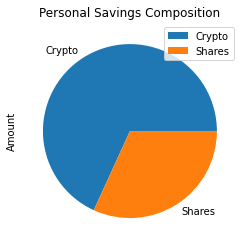

In [14]:
# Plot savings pie chart
df_savings.plot.pie(y="Amount", title="Personal Savings Composition")

In [15]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = float(df_savings.sum())

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Great, You have saved three times your monthly expenses! Keep pushing to increase your savings.")
else:
    print(f"You are ${(emergency_fund - total_savings):0.2f} away from your emergency fund goal, continue saving between 10% and 20% of your monthly income to reach your goal.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [16]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-09-09', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-09-09', tz='America/New_York').isoformat()

In [17]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_stock_data.head()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2021-04-20 00:00:00-04:00  114.42  114.6700  114.3900  114.62  3674209   
2021-04-21 00:00:00-04:00  114.60  114.7400  114.5300  114.74  5250384   
2021-04-22 00:00:00-04:00  114.74  114.8000  114.5900  114.77  3518947   
2021-04-23 00:00:00-04:00  114.81  115.0860  114.6415  114.75  3506457   
2021-04-26 00:00:00-04:00  114.74  114.8015  114.6500  114.65  2867784   

                              SPY                                        
                             open      high       low   close    volume  
time                                                                     
2021-04-20 00:00:00-04:00  413.91  415.0859  410.5900  412.22  69715050  
2021-04-21 00:00:00-04:00  411.51  416.2900  411.3600  416.08  54772634  
2021-04-22 00:00:00-04:00  415.88  416.7800  411.1300  412.30  90086341  
2021-04-23 00:00:00-04:00  412.87  418.2500  412.7900  416.72  62184753  
2021-04-26 00:00:00-04:00  417.44  418.2200  416.8111  417.64  44689009

In [18]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.6, .4],
    num_simulation = 1000,
    num_trading_days = 252*30
)


In [19]:
# Printing the simulation input data
MC_even_dist.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2021-04-20 00:00:00-04:00  114.42  114.6700  114.3900  114.62  3674209   
2021-04-21 00:00:00-04:00  114.60  114.7400  114.5300  114.74  5250384   
2021-04-22 00:00:00-04:00  114.74  114.8000  114.5900  114.77  3518947   
2021-04-23 00:00:00-04:00  114.81  115.0860  114.6415  114.75  3506457   
2021-04-26 00:00:00-04:00  114.74  114.8015  114.6500  114.65  2867784   

                                           SPY                              \
                          daily_return    open      high       low   close   
time                                                                         
2021-04-20 00:00:00-04:00          NaN  413.91  415.0859  410.5900  412.22   
2021-04-21 00:00:00-04:00     0.001047  411.51  416.2900  411.3600  416.08   
2021-04-22 00:00:00-04:00     0.000261  415.88  416.7800  411.1300  412.30   
2021-04-23 00:00:00-04:00    -0.000174  412.87  418.2500  412.7900  416.72   
2021-04-26 00:00:00-04:00    -0.000871  417.44  418.2200  416.8111  417.64   

                                                  
                             volume daily_return  
time                                              
2021-04-20 00:00:00-04:00  69715050          NaN  
2021-04-21 00:00:00-04:00  54772634     0.009364  
2021-04-22 00:00:00-04:00  90086341    -0.009085  
2021-04-23 00:00:00-04:00  62184753     0.010720  
2021-04-26 00:00:00-04:00  44689009     0.002208

In [20]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000059,0.997640,1.007685,1.000288,0.995304,1.000292,1.001210,0.997961,1.001896,0.996296,...,1.000736,0.997482,0.999079,1.003629,1.003295,0.999180,0.999222,0.999004,1.002164,1.003141
2,1.001319,0.993022,1.009167,1.002272,0.994058,1.001232,0.997471,0.996549,1.005086,0.996507,...,0.997547,1.001104,1.004417,1.000554,1.005713,0.995753,1.000241,0.996937,0.999351,1.001153
3,0.999075,0.992867,1.010792,1.006064,0.994893,1.001841,1.000890,0.996264,1.005645,0.993403,...,0.996292,1.002216,1.005976,0.996634,1.004377,0.994355,1.001028,0.997315,1.003027,1.002110
4,1.007105,0.990764,1.012426,1.012169,0.996906,1.001017,0.999429,0.993220,1.012373,0.990320,...,0.995505,1.003189,1.009787,0.995923,1.008726,0.991588,1.001463,0.996817,1.004816,0.998053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,35.096110,26.304375,29.334363,27.762108,24.481754,29.460705,27.476471,38.870437,21.931581,28.809221,...,21.139327,25.858528,24.242764,24.699082,28.977264,25.007391,22.445499,19.319487,29.230004,25.977947
7557,35.161296,26.303497,29.461436,27.834508,24.622940,29.482893,27.550759,38.785780,21.977973,28.797435,...,21.172897,25.796362,24.223380,24.679460,28.989124,25.144117,22.472549,19.340754,29.325558,25.981141
7558,35.213359,26.257485,29.591164,27.804936,24.657342,29.476512,27.614979,38.801978,22.016886,28.863319,...,21.301950,25.760368,24.144077,24.703822,29.073834,25.191298,22.452155,19.390987,29.439130,26.028709
7559,35.187806,26.193441,29.541254,27.979846,24.589940,29.309528,27.660130,38.769846,22.034565,28.953418,...,21.293657,25.730920,24.192840,24.673456,29.052302,25.147475,22.480953,19.428874,29.454117,25.937342


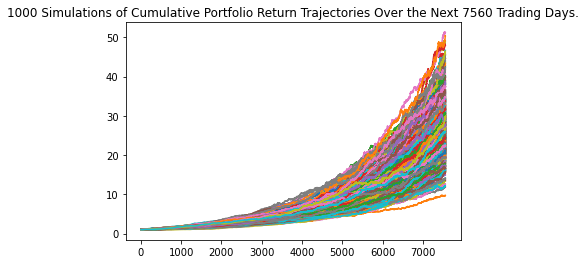

In [21]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

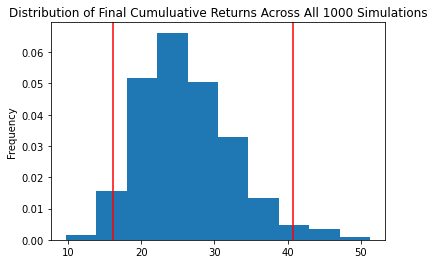

In [22]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [23]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()
print(even_tbl)



count           1000.000000
mean              26.208254
std                6.331916
min                9.708405
25%               21.545593
50%               25.351897
75%               29.912916
max               51.246748
95% CI Lower      16.193802
95% CI Upper      40.782475
Name: 7560, dtype: float64


In [24]:
# Print summary statistics
even_ci_lower = round(even_tbl[8]*15000,2)
even_ci_upper = round(even_tbl[9]*15000,2)

print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}.")

There is a 95% chance that an initial investment of $15,000 in the portfolio over the next 5 years will end within in the range of $242907.02 and $611737.12.


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [26]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_tbl[8] * initial_investment,2)
ci_upper = round(even_tbl[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $323876.03 and $815649.49


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [27]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(even_tbl[8] * initial_investment,2)
ci_upper = round(even_tbl[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $485814.05 and $1223474.24


## Early Retirement


### Five Years Retirement Option

In [28]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252 * 5
)

In [29]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000155,1.003254,1.001215,0.999702,1.001392,1.001605,1.001396,0.997007,0.998806,0.997592,...,1.002283,0.999045,1.001497,0.999427,1.001377,1.000104,1.000433,0.996364,1.001364,0.997315
2,0.999314,1.002349,1.001474,1.000556,0.999979,1.000040,1.003502,0.997383,0.996438,1.000138,...,1.002011,0.996725,1.000966,0.998577,1.004300,1.002720,0.998825,0.995587,1.005480,0.996382
3,0.997948,1.004135,1.000406,1.005783,0.996247,0.997279,1.002787,0.999728,0.999442,0.998938,...,1.002207,0.998053,1.001964,0.997413,1.004907,1.002561,0.999977,0.997618,1.006581,0.997955
4,0.999016,1.003109,1.002802,1.005860,0.998190,0.997133,1.002283,0.998864,1.002906,0.998562,...,1.000855,0.999080,1.001994,1.001822,1.004382,1.002698,0.996257,0.997329,1.005546,0.994829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.362860,1.494678,1.519934,1.341189,1.207781,1.349771,1.430324,1.271747,1.346606,1.439918,...,1.178814,1.336084,1.562299,1.500426,1.483648,1.414382,1.373608,1.358798,1.536787,1.393082
1257,1.361799,1.497920,1.523538,1.342226,1.208383,1.346174,1.432791,1.273897,1.350421,1.439215,...,1.177888,1.336792,1.563920,1.501250,1.481942,1.417642,1.370957,1.358808,1.535735,1.396770
1258,1.361441,1.498428,1.524922,1.342790,1.211036,1.344924,1.434876,1.277952,1.349262,1.442881,...,1.173508,1.334211,1.561087,1.503173,1.480454,1.417683,1.378624,1.356023,1.531235,1.396385
1259,1.361848,1.496104,1.525755,1.344838,1.211658,1.341319,1.435114,1.276398,1.347515,1.442847,...,1.171106,1.335063,1.561021,1.503202,1.476339,1.415790,1.376513,1.355672,1.533662,1.390575


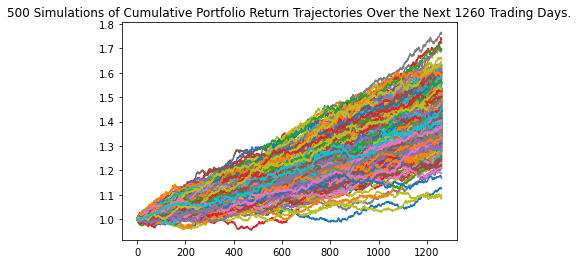

In [30]:
# Plot simulation outcomes
fiveyear_line_plot = MC_five_year.plot_simulation()

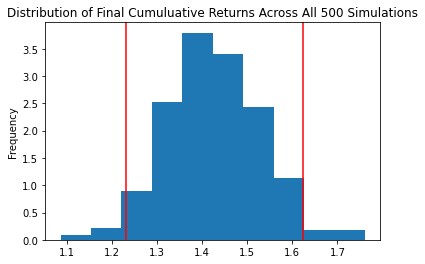

In [31]:
# Plot probability distribution and confidence intervals
fiveyear_dist_plot = MC_five_year.plot_distribution()

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")